In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

print("reading data...")
df_train = pd.read_csv('train.csv', encoding="ISO-8859-1")
df_test = pd.read_csv('test.csv', encoding="ISO-8859-1")
# df_attr = pd.read_csv('../input/attributes.csv')
df_pro_desc = pd.read_csv('product_descriptions.csv')

attributes = pd.read_csv("attributes.csv")

reading data...


In [226]:
df_train.describe()

,id,product_uid,relevance
count,74067.000000,74067.000000,74067.000000
mean,112385.709223,142331.911553,2.381634
std,64016.573650,30770.774864,0.533984
min,2.000000,100001.000000,1.000000
25%,57163.500000,115128.500000,2.000000
50%,113228.000000,137334.000000,2.330000
75%,168275.500000,166883.500000,3.000000
max,221473.000000,206650.000000,3.000000


In [232]:
df_pro_desc.describe(include=['O'])

,product_description
count,124428
unique,110128
top,Team spirit by the gallon. With the officially...
freq,43


In [235]:
attributes

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90° connection...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel
5,100001.0,Bullet06,Galvanized for extra corrosion resistance
6,100001.0,Bullet07,Install with 10d common nails or #9 x 1-1/2 in...
7,100001.0,Gauge,12
8,100001.0,Material,Galvanized Steel
9,100001.0,MFG Brand Name,Simpson Strong-Tie


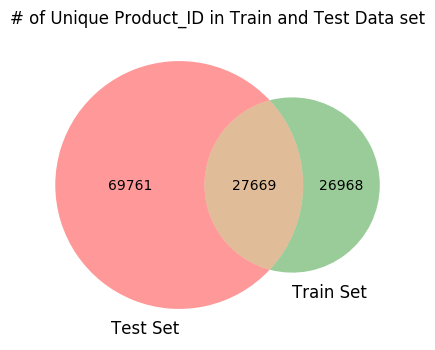

In [17]:
import pylab as plt
from matplotlib_venn import venn2, venn2_circles

v = venn2(subsets=(3,1,1,3,0,0,0),set_labels=('Test Set', 'Train Set'))
v.get_label_by_id('10').set_text('69761')
v.get_label_by_id('01').set_text('26968')
v.get_label_by_id('11').set_text('27669')

plt.title("# of Unique Product_ID in Train and Test Data set")
plt.show()


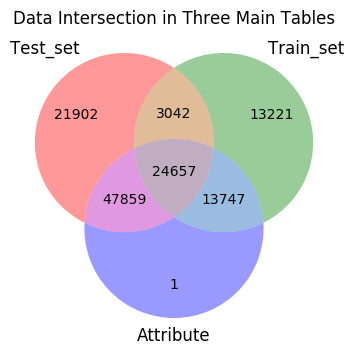

In [2]:
import pylab as plt
from matplotlib_venn import venn3, venn3_circles

v = venn3(subsets=(1,1,1,1,1,1,0),set_labels=('Test_set','Train_set','Attribute'))
v.get_label_by_id('100').set_text('21902')
v.get_label_by_id('010').set_text('13221')
v.get_label_by_id('001').set_text('1')
v.get_label_by_id('110').set_text('3042')
v.get_label_by_id('101').set_text('47859')
v.get_label_by_id('011').set_text('13747')
v.get_label_by_id('111').set_text('24657')
plt.title("Data Intersection in Three Main Tables")
plt.show()

In [29]:
import seaborn as sns

In [39]:
df_train.relevance.describe(include=['O'])

count    74067.000000
mean         2.381634
std          0.533984
min          1.000000
25%          2.000000
50%          2.330000
75%          3.000000
max          3.000000
Name: relevance, dtype: float64

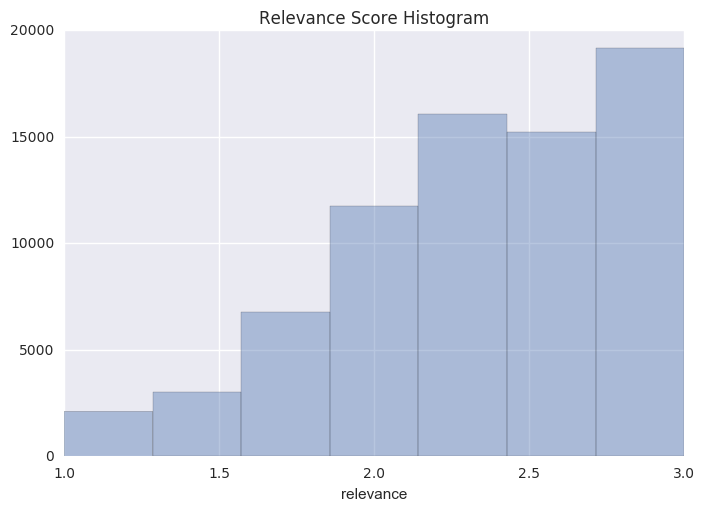

In [52]:
sns.distplot(df_train.relevance,kde=False,bins=7)
plt.title("Relevance Score Histogram")
plt.show()

In [101]:
s=df_train.pivot_table(index='product_uid',values='relevance',aggfunc='mean')
c=df_train.pivot_table(index='product_uid',values='relevance',aggfunc='count')

In [102]:
s=np.array(s)
c=np.array(c)

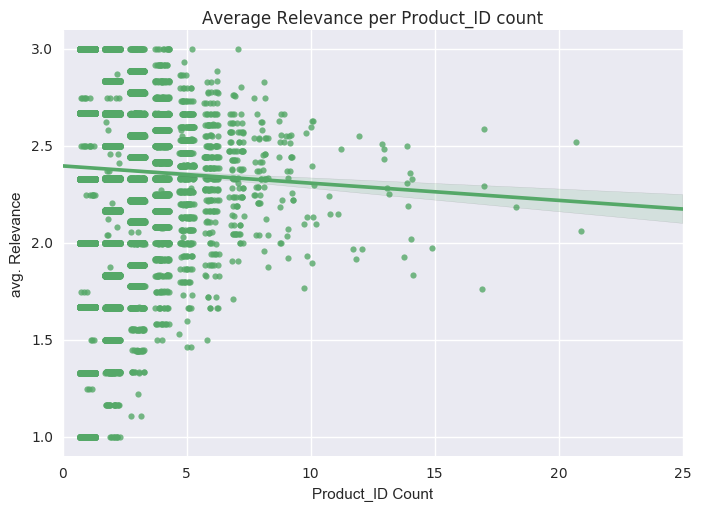

In [128]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(c,s, x_jitter=.3,color="g")
plt.xlim(0,25)
plt.ylim(0.9,3.1)
plt.title('Average Relevance per Product_ID count')
plt.xlabel('Product_ID Count')
plt.ylabel('avg. Relevance')
plt.show()

In [127]:
np.corrcoef(c,s)

array([[ 1.        , -0.01561792],
       [-0.01561792,  1.        ]])

In [130]:
import scipy.stats as ss
ss.spearmanr(c,s)

SpearmanrResult(correlation=-0.05291680730245997, pvalue=3.3178112520100047e-35)

In [131]:
s_s=df_train.pivot_table(index='search_term',values='relevance',aggfunc='mean')
c_s=df_train.pivot_table(index='search_term',values='relevance',aggfunc='count')

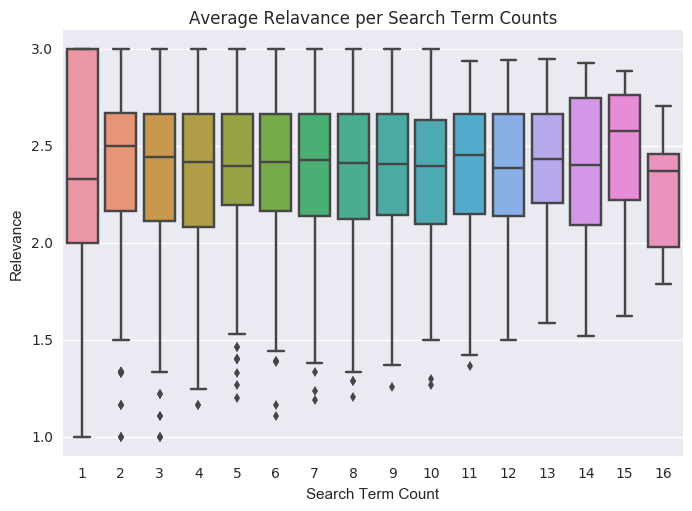

In [140]:
ax = sns.boxplot(c_s, s_s)
#ax = sns.swarmplot(c_s, s_s, color=".25")
plt.xlabel('Search Term Count')
plt.ylabel('Relevance')
plt.ylim(0.9,3.1)
plt.title('Average Relavance per Search Term Counts')
plt.show()

# The Jaccard Similarity Coefficent between {search_term} and the {product_title} is caculated and plotted against the relevance score.

In [4]:
from  sklearn.metrics import jaccard_similarity_score as js

In [5]:
def two_array(x,y):
    l=[]
    for xi in x.split(' '):
        l.append(xi.lower())
    for yi in y.split(' '):
        l.append(yi.lower())
    length = len(set(l))
    ll = list(set(l))
    
    x_l=[]
    y_l=[]
    for i,lli in enumerate(ll):
        if x.lower().find(lli) >= 0:
                x_l.append(i)
        else:
                x_l.append(length)
                length +=1
        if y.lower().find(lli) >= 0:
                y_l.append(i)
        else:
                y_l.append(length)
                length +=1
    return x_l,y_l
       
    

In [6]:
js_score=[]
for i,t in enumerate(df_train.product_title):
    j=js(two_array(t,df_train.search_term[i])[0],two_array(t,df_train.search_term[i])[1])
    js_score.append(j)

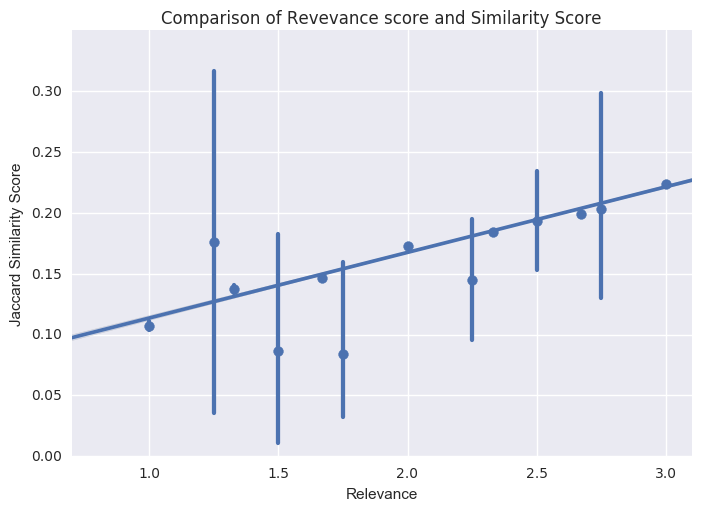

In [7]:
import seaborn as sns; sns.set(color_codes=True)
js_score = np.array(js_score)
re = np.array(df_train.relevance)
ax = sns.regplot(re,js_score,x_estimator=np.mean)
plt.xlim(0.7,3.1)
plt.ylim(0,0.35)
plt.title('Comparison of Revevance score and Similarity Score')
plt.xlabel('Relevance')
plt.ylabel('Jaccard Similarity Score')
plt.show()

In [220]:
attributes.name.value_counts()

MFG Brand Name                       86250
Bullet02                             86248
Bullet03                             86226
Bullet04                             86174
Bullet01                             85940
Product Width (in.)                  61137
Bullet05                             60529
Product Height (in.)                 54698
Product Depth (in.)                  53652
Product Weight (lb.)                 45175
Bullet06                             44901
Color Family                         41508
Bullet07                             34349
Material                             31500
Color/Finish                         28564
Bullet08                             26645
Certifications and Listings          24583
Bullet09                             20567
Assembled Height (in.)               18299
Assembled Width (in.)                18263
Assembled Depth (in.)                18198
Product Length (in.)                 16705
Bullet10                             14763
Indoor/Outd

In [8]:
np.corrcoef(re,js_score)

array([[ 1.        ,  0.26126415],
       [ 0.26126415,  1.        ]])

In [16]:
!pip install xgboost

  Retrying (Retry(total=4, connect=None, read=None, redirect=None)) after connection broken by 'NewConnectionError('<pip._vendor.requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x10379f048>: Failed to establish a new connection: [Errno 61] Connection refused',)': /simple/xgboost/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None)) after connection broken by 'NewConnectionError('<pip._vendor.requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x103d206d8>: Failed to establish a new connection: [Errno 61] Connection refused',)': /simple/xgboost/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None)) after connection broken by 'NewConnectionError('<pip._vendor.requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x103d20a20>: Failed to establish a new connection: [Errno 61] Connection refused',)': /simple/xgboost/
  Retrying (Retry(total=1, connect=None, read=None, redirect=None)) after connection bro

In [15]:
n.NgramTagger(['Husky', '52', 'in.', '10-Drawer', 'Mobile',
'Workbench', 'with', 'Solid', 'Wood', 'Top', 'Black'])

ValueError: Must specify either training data or trained model.